In [1]:
import json
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu
import pickle
import cv2
import matplotlib.pyplot as plt

In [2]:
def load_json_file(json_file_name):
  file_obj=open(json_file_name)
  all_data=json.load(file_obj)
  unique_word_to_code_mapping=all_data['unique_word_to_code_mapping']
  unique_code_to_word_mapping=all_data['unique_code_to_word_mapping']
  max_caption_length=all_data['max_caption_length']
  test_image_caption_mapping=all_data['test_image_caption_mapping']
  file_obj.close()
  return unique_word_to_code_mapping,unique_code_to_word_mapping,max_caption_length,test_image_caption_mapping

In [3]:
json_file_name="/content/drive/MyDrive/Colab Notebooks/Image Captioning/json_files/all_data.json"
unique_word_to_code_mapping,unique_code_to_word_mapping,max_caption_length,test_image_caption_mapping=load_json_file(json_file_name)

In [4]:
def load_pickle_file(test_image_features_pickle,lstm_model_pickle):
  test_image_features=pickle.load(open(test_image_features_pickle,"rb"))
  lstm_model=pickle.load(open(lstm_model_pickle,"rb"))
  return test_image_features,lstm_model

In [5]:
test_image_features_pickle="/content/drive/MyDrive/Colab Notebooks/Image Captioning/pickle_files/test_image_features.pkl"
lstm_model_pickle="/content/drive/MyDrive/Colab Notebooks/Image Captioning/pickle_files/lstm_model.pkl"
test_image_features,lstm_model=load_pickle_file(test_image_features_pickle,lstm_model_pickle)

In [6]:
def greedy_search(testing_image_feature):
  testing_image_feature=testing_image_feature.reshape(1,2048)
  complete_sentence='<start>'
  for i in range(max_caption_length):
    sentence=[]
    for s in complete_sentence.split(" "):
      if s in unique_word_to_code_mapping:
        sentence.append(unique_word_to_code_mapping[s])
    sentence = pad_sequences([sentence], maxlen=max_caption_length, padding='post')
    output_pred = lstm_model.predict([testing_image_feature,sentence],verbose=0)
    output_pred = np.argmax(output_pred[0])
    word = unique_code_to_word_mapping[str(output_pred)]
    complete_sentence += ' ' + word
    if word == '<end>':
      break
  output_sentence = complete_sentence.split()
  output_sentence = output_sentence[1:-1]
  return output_sentence

image_name is  2511019188_ca71775f2d.jpg


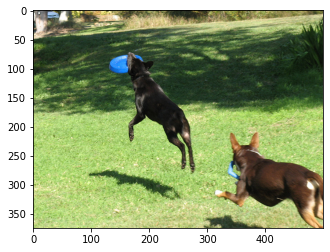

Source Captions: 
dog with a Frisbee in front of a brown dog
large black dog be catch a Frisbee while a large brown dog follow shortly after
dark colored dog romp in the grass with a blue Frisbee
dog be catch blue Frisbee in grass
dog be play ; one be catch a Frisbee
Predicted Caption - 
German German German German dog dog white and a ocean and a woman be be be be be be be be be be be Dog white and braid snow snow snow snow snow snow snow snow snow
Bleu Score - 0.6345814629568174
image_name is  3642220260_3aa8a52670.jpg


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


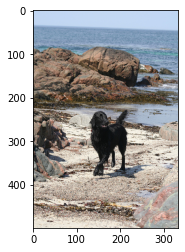

Source Captions: 
black dog on a rocky beach
black dog walk along an ocean front
black dog walk on a beach near rock
black dog walk on the sand
dog walk on a beach after swim in the ocean
Predicted Caption - 
black black black black black black black black wear after after after after after after after after after after after after of of of of of of of of of along Unk Unk Unk Unk Unk Unk
Bleu Score - 0.5336172773868456
image_name is  3354883962_170d19bfe4.jpg


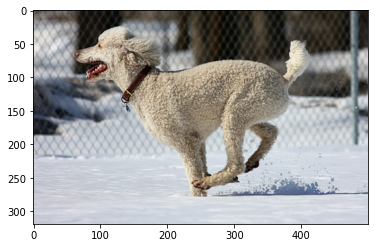

Source Captions: 
dog run in the snow
off-white dog have his mouth open as he bound through a fenced-in snowy area
white dog run past a fence on a snowy day
white dog with a black collar run in the snow
white poodle be run in the snow , near a chain link fence
Predicted Caption - 
German German black put after after after after after after white the each each each each each each each each each each each body Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk
Bleu Score - 0.5336172773868456
image_name is  2677656448_6b7e7702af.jpg


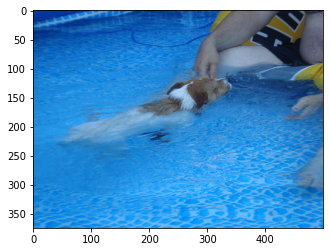

Source Captions: 
brown and white dog swim towards some in a
dog in a swim pool swim toward sombody we cannot see
dog swim in a pool near a person
dog be paddle through the water in a pool
small brown and white dog be in a pool
Predicted Caption - 
ball white ball Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk
Bleu Score - 0.40546144983876986
image_name is  3213992947_3f3f967a9f.jpg


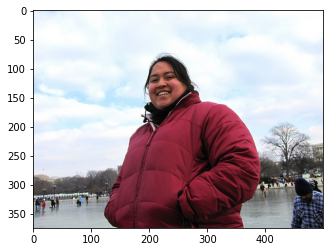

Source Captions: 
girl in a red jacket , surround by person
woman in a puffy red jacket pose for a picture at an ice skate rink
woman in a red coat be smile , while person in the background be walk around in winter clothing
woman wear a red coat smile down at the camera
woman in a red jacket be smile at the camera
Predicted Caption - 
object white road white road white walk white Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk Unk
Bleu Score - 0.40546144983876986


In [7]:
image_dataset_path="/content/drive/MyDrive/Colab Notebooks/Image Captioning/Flickr8k_Dataset/Flicker8k_Dataset/"
test_images_list=["2511019188_ca71775f2d.jpg","3642220260_3aa8a52670.jpg","3354883962_170d19bfe4.jpg","2677656448_6b7e7702af.jpg","3213992947_3f3f967a9f.jpg"]
for image_name in test_images_list:
  print("image_name is ",image_name)
  image_location=image_dataset_path + image_name
  testing_image=cv2.imread(image_location)
  plt.imshow(cv2.cvtColor(testing_image,cv2.COLOR_BGR2RGB))
  testing_image_feature=test_image_features[image_name]
  plt.show()
  source_caption=[]
  for caption in test_image_caption_mapping[image_name]:
    caption_list=caption.split(" ")[1:-1]
    source_caption.append(caption_list)
  candidate=greedy_search(testing_image_feature)
  score = sentence_bleu(source_caption, candidate)
  print("Source Captions: ")
  for caption in source_caption:
    print(" ".join(caption))
  print("Predicted Caption - ")
  print(" ".join(candidate))
  print("Bleu Score -",score)